In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import userdata
token =userdata.get('Cryptonite-Token')

In [3]:
!git config --global user.email "idantsri2007@gmail.com"
!git config --global user.name "SILETRO"

In [4]:
!git clone https://{token}@github.com/SILETRO/Cryptonite-RTP-Idant.git
%cd Cryptonite-RTP-Idant

Cloning into 'Cryptonite-RTP-Idant'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 86 (delta 23), reused 68 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (86/86), 1.66 MiB | 6.95 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/Cryptonite-RTP-Idant


In [5]:
%cd /content/Cryptonite-RTP-Idant

/content/Cryptonite-RTP-Idant


In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/Deepwe.ipynb' Task-4/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imsparsh/deepweeds")
print("Path to dataset files:", path)

100%|██████████| 470M/470M [00:02<00:00, 166MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/imsparsh/deepweeds/versions/2


In [3]:
imgPath = path + '/images/'
labelsBase = path + '/labels/'
labelsPath = labelsBase + 'labels.csv'
labels_df = pd.read_csv(labelsPath)

In [4]:
labels_df['Species'].unique()

array(['Chinee apple', 'Lantana', 'Negative', 'Snake weed', 'Siam weed',
       'Prickly acacia', 'Parthenium', 'Rubber vine', 'Parkinsonia'],
      dtype=object)

In [9]:
labels_df

,Filename,Label,Species
0,20160928-140314-0.jpg,0,Chinee apple
1,20160928-140337-0.jpg,0,Chinee apple
2,20160928-140731-0.jpg,0,Chinee apple
3,20160928-140747-0.jpg,0,Chinee apple
4,20160928-141107-0.jpg,0,Chinee apple
...,...,...,...
17504,20180322-133822-1.jpg,8,Negative
17505,20180322-133832-1.jpg,8,Negative
17506,20180322-133840-1.jpg,8,Negative
17507,20180322-133850-1.jpg,8,Negative


<BarContainer object of 9 artists>

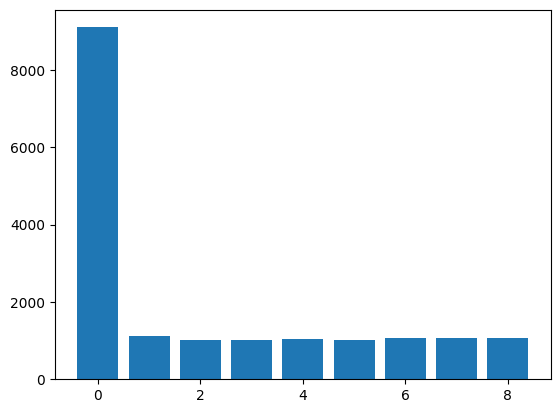

In [20]:
plt.bar(labels_df['Label'].unique(),labels_df['Label'].value_counts())

In [6]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(labels_df, train_size=0.8, random_state=42, shuffle=True)
val_df, test_df = train_test_split(temp_df, train_size=0.5, random_state=42, shuffle=True)

In [7]:
train_df.Label.value_counts()

,count
Label,
8,7270
0,912
4,852
6,851
1,849
2,832
7,825
5,809
3,807


In [8]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=(0.8, 1.2))

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

In [9]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=imgPath,
    x_col='Filename',
    y_col='Species',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode = 'categorical',
    shuffle = True,
    seed=42
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=imgPath,
    x_col='Filename',
    y_col='Species',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=imgPath,
    x_col='Filename',
    y_col='Species',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

print("Data generators created successfully.")

Found 14007 validated image filenames belonging to 9 classes.
Found 1751 validated image filenames belonging to 9 classes.
Found 1751 validated image filenames belonging to 9 classes.
Data generators created successfully.


In [10]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

In [11]:
class_weights_dict

{0: np.float64(1.7065058479532165),
 1: np.float64(1.8331370239497449),
 2: np.float64(0.21407611187528658),
 3: np.float64(1.8705929487179487),
 4: np.float64(1.9285419248244526),
 5: np.float64(1.8266823161189358),
 6: np.float64(1.92377420683972),
 7: np.float64(1.8288288288288288),
 8: np.float64(1.8864646464646464)}

In [12]:
train_generator.image_shape

(224, 224, 3)

In [13]:
base_model = tf.keras.applications.ResNet50(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
base_model.trainable = False

In [15]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

model_head = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])
outputs = model_head(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [17]:
model.compile(optimizer='Adam',loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.categorical_accuracy])

In [18]:
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=model.fit(train_generator,epochs=10,class_weight = class_weights_dict,validation_data=validation_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 220s 465ms/step - categorical_accuracy: 0.3349 - loss: 1.9334 - val_categorical_accuracy: 0.6094 - val_loss: 1.1056
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 186s 425ms/step - categorical_accuracy: 0.5305 - loss: 1.0587 - val_categorical_accuracy: 0.5425 - val_loss: 1.3701
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 186s 424ms/step - categorical_accuracy: 0.5764 - loss: 0.9264 - val_categorical_accuracy: 0.6305 - val_loss: 1.0756
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 186s 425ms/step - categorical_accuracy: 0.6148 - loss: 0.8542 - val_categorical_accuracy: 0.5957 - val_loss: 1.1056
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 184s 420ms/step - categorical_accuracy: 0.6122 - loss: 0.8622 - val_categorical_accuracy: 0.6990 - val_loss: 0.8351
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 188s 429ms/step - categorical_accuracy: 0.6402 - loss: 0.7696 - val_categorical_accuracy: 0.6882 - val_loss: 0.8769
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 185s 421ms/step - catego

In [26]:
for layer in base_model.layers[-30:]:
    layer.trainable = True
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = model_head(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.categorical_accuracy])

In [27]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history_fine = model.fit(train_generator,
                         epochs=30,
                         initial_epoch=len(history.epoch),
                         class_weight = class_weights_dict,
                         validation_data=validation_generator,callbacks=[stop_early])

Epoch 11/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 217s 454ms/step - accuracy: 0.7592 - categorical_accuracy: 0.7592 - loss: 0.7157 - val_accuracy: 0.8041 - val_categorical_accuracy: 0.8041 - val_loss: 1.1506
Epoch 12/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 189s 430ms/step - accuracy: 0.8513 - categorical_accuracy: 0.8513 - loss: 0.4562 - val_accuracy: 0.8247 - val_categorical_accuracy: 0.8247 - val_loss: 0.9973
Epoch 13/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 189s 430ms/step - accuracy: 0.8787 - categorical_accuracy: 0.8787 - loss: 0.3709 - val_accuracy: 0.8418 - val_categorical_accuracy: 0.8418 - val_loss: 1.0228
Epoch 14/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 189s 431ms/step - accuracy: 0.8905 - categorical_accuracy: 0.8905 - loss: 0.3444 - val_accuracy: 0.8784 - val_categorical_accuracy: 0.8784 - val_loss: 0.5678
Epoch 15/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 195s 443ms/step - accuracy: 0.9027 - categorical_accuracy: 0.9027 - loss: 0.2924 - val_accuracy: 0.8841 - val_categorical_accuracy: 0.8841 - val_loss: 0.5754
Epoch

In [28]:
model.evaluate(test_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.8985 - categorical_accuracy: 0.8985 - loss: 0.5005


[0.45129823684692383, 0.8960593938827515, 0.8960593938827515]

In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
y_pred = model.predict(test_generator)
y_pred_class = np.argmax(y_pred,axis=1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 296ms/step


In [32]:
precision_score(test_generator.classes,y_pred_class,average='weighted')

0.9011820381311805

In [33]:
recall_score(test_generator.classes,y_pred_class,average='weighted')

0.8960593946316391

In [34]:
f1_score(test_generator.classes,y_pred_class,average='weighted')

0.8952467256070068

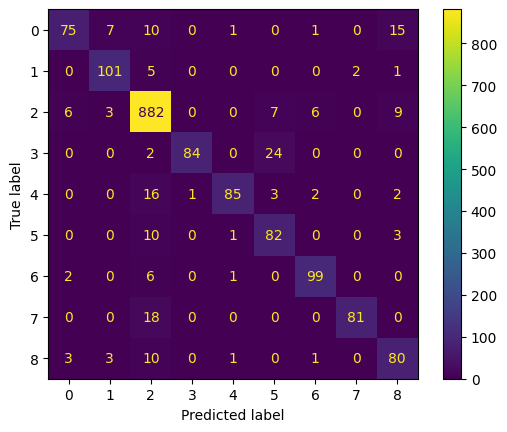

In [36]:
cm = confusion_matrix(test_generator.classes,y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()